## Работа с регулярными выражениями

In [125]:
import re 

def validate_email(email):
    pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]'

    if re.match(pattern, email):
        return True

    else:
        return False

email1 = "artem@golubnichij.ru"
email2 = "artem__golubnichij.ru"
email3 = "!rtem@golubnichij.ru"
email4 = "art em@golubnichij.ru"
email5 = "art234234em@golubnichij.ru"


print(validate_email(email1))
print(validate_email(email2))
print(validate_email(email3))
print(validate_email(email4))
print(validate_email(email5))


True
False
False
False
True


In [126]:
def validate_fio(fio):
    pattern = r'^[А-Я][а-я]+\s[А-Я][а-я]+\s[А-Я][а-я]+$'
    #pattern=r'[А-ЯЁ][а-яё]+\s+[А-ЯЁ][а-яё]+(?:\s+[А-ЯЁ][а-яё]+)'
    if re.match(pattern, fio):
        return True

    else:
        return False

text1 = "Иванов Иван Иванович"
print(validate_fio(text1))


True


In [127]:
def validate_pw(pw):
    #pattern = r'[A-Za-z0-9._%]{8,}'
    pattern = r'^[a-zA-Z0-9]{8,}'
    if re.match(pattern, pw):
        return True

    else:
        return False

pw1 = "passwor?:*%183613)"
print(validate_pw(pw1))

False


In [128]:
def validate_phone(phone):
    pattern = r'^\+7 \(\d{3}\) \d{3}-\d{2}-\d{2}$'
    #pattern = r'^8-\d{3}-\d{3}-\d{2}-\d{2}$'
    if re.match(pattern, phone):
        return True

    else:
        return False

phone1 = "+7 (999) 999-99-99"
print(validate_phone(phone1))

True


## Кейс обработка текста

### Подключение библиотек и загрузка данных

In [129]:
import numpy as np
import pandas as pd
import re
import nltk
import string

pd.options.mode.chained_assignment = None

full_df = pd.read_csv("tweet_small.csv")

### Просмотр данных

In [130]:
df = full_df[["text"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    93 non-null     object
dtypes: object(1)
memory usage: 876.0+ bytes


In [131]:
print(df)

                                                 text
0   @AppleSupport causing the reply to be disregar...
1   @105835 Your business means a lot to us. Pleas...
2   @76328 I really hope you all change but I'm su...
3   @105836 LiveChat is online at the moment - htt...
4   @VirginTrains see attached error message. I've...
..                                                ...
88  @105860 I wish Amazon had an option of where I...
89  They reschedule my shit for tomorrow https://t...
90  @105861 Hey Sara, sorry to hear of the issues ...
91  @Tesco bit of both - finding the layout cumber...
92  @105861 If that doesn't help please DM your fu...

[93 rows x 1 columns]


### Перевод к нижнему регистру

In [132]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...


### Удаление пунктуации

In [133]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(remove_punctuation)
df.head()


,text,text_lower,text_wo_punct
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...


### Удаление стоп-слов

In [134]:
from nltk.corpus import stopwords
nltk.download("stopwords")
", ".join(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [135]:
STOPWORDS = set(stopwords.words("english"))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split(" ") if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(remove_stopwords)
df.head()

,text,text_lower,text_wo_punct,text_wo_stop
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...,applesupport causing reply disregarded tapped ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...,105835 business means lot us please dm name zi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...,virgintrains see attached error message ive tr...


### Удаление частых слов

In [136]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('us', 25),
 ('dm', 19),
 ('help', 18),
 ('thanks', 13),
 ('httpstcogdrqu22ypt', 12),
 ('applesupport', 11),
 ('please', 11),
 ('phone', 9),
 ('hi', 9),
 ('ive', 8)]

In [137]:
FREQWORDS = set([w for (w,ws) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split(" ") if word not in FREQWORDS])

df["text_wo_stop_freq"] = df["text_wo_stop"].apply(remove_freqwords)
df.head()


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_stop_freq
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,applesupport causing the reply to be disregard...,applesupport causing reply disregarded tapped ...,causing reply disregarded tapped notification ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 your business means a lot to us please ...,105835 business means lot us please dm name zi...,105835 business means lot name zip code additi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 i really hope you all change but im sure...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat is online at the moment https...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message ive tr...,virgintrains see attached error message ive tr...,virgintrains see attached error message tried ...


### Удаление лишних столбцов

In [138]:
df.drop(["text_wo_punct", "text_wo_stop"], axis=1, inplace=True)

### Удаление редких слов

In [139]:
n_rare_words = 10
RAREWORDS = set([w for (w,ws) in cnt.most_common()[:-n_rare_words-1:-1]])
RAREWORDS

{'browser',
 'green',
 'httpstco9281okeebk',
 'including',
 'keen',
 'lee',
 'line',
 'log',
 'slowdown',
 'thin'}

In [140]:
def remove_rarewords(text):
    return " ".join([word for word in str(text).split(" ") if word not in RAREWORDS])

df["text_wo_stop_freq_rare"] = df["text_wo_stop_freq"].apply(remove_rarewords)
df.head()

,text,text_lower,text_wo_stop_freq,text_wo_stop_freq_rare
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,causing reply disregarded tapped notification ...,causing reply disregarded tapped notification ...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 business means lot name zip code additi...,105835 business means lot name zip code additi...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message tried ...,virgintrains see attached error message tried ...


### Стемминг

In [141]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(stem_words)
df.head()

,text,text_lower,text_wo_stop_freq,text_wo_stop_freq_rare,text_stemmed
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,causing reply disregarded tapped notification ...,causing reply disregarded tapped notification ...,@applesupport caus the repli to be disregard a...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,105835 business means lot name zip code additi...,105835 business means lot name zip code additi...,@105835 your busi mean a lot to us. pleas dm y...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,76328 really hope change im sure wont dont,76328 really hope change im sure wont dont,@76328 i realli hope you all chang but i'm sur...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,105836 livechat online moment httpstcosy94vtu...,105836 livechat online moment httpstcosy94vtu...,@105836 livechat is onlin at the moment - http...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,virgintrains see attached error message tried ...,virgintrains see attached error message tried ...,@virgintrain see attach error message. i'v tri...


In [142]:
df.drop(["text_wo_stop_freq", "text_wo_stop_freq_rare"], axis=1, inplace=True)

In [143]:
df.head()

,text,text_lower,text_stemmed
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,@applesupport caus the repli to be disregard a...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,@105835 your busi mean a lot to us. pleas dm y...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,@76328 i realli hope you all chang but i'm sur...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,@105836 livechat is onlin at the moment - http...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,@virgintrain see attach error message. i'v tri...


### Пример стемминга

In [144]:
wrds = ["wait", "waiting", "waited", "waits", "Kuwait", "reply"]
for w in wrds:
    print(stemmer.stem(w))

wait
wait
wait
wait
kuwait
repli


### Обработка русского языка

In [145]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')
wrds = ["Гуляла", 'reply']
for w in wrds:
    print(stemmer.stem(w))

гуля
reply


### Лемматизация

In [146]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lemmatize_words)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,text_lower,text_stemmed,text_lemmatized
0,@AppleSupport causing the reply to be disregar...,@applesupport causing the reply to be disregar...,@applesupport caus the repli to be disregard a...,@AppleSupport causing the reply to be disregar...
1,@105835 Your business means a lot to us. Pleas...,@105835 your business means a lot to us. pleas...,@105835 your busi mean a lot to us. pleas dm y...,@105835 Your business mean a lot to us. Please...
2,@76328 I really hope you all change but I'm su...,@76328 i really hope you all change but i'm su...,@76328 i realli hope you all chang but i'm sur...,@76328 I really hope you all change but I'm su...
3,@105836 LiveChat is online at the moment - htt...,@105836 livechat is online at the moment - htt...,@105836 livechat is onlin at the moment - http...,@105836 LiveChat is online at the moment - htt...
4,@VirginTrains see attached error message. I've...,@virgintrains see attached error message. i've...,@virgintrain see attach error message. i'v tri...,@VirginTrains see attached error message. I've...


## Анализ тональности текстов

### Загрузка данных и пакетов

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Corona_NLP_train.csv", encoding="latin-1")
print(df.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [148]:
print(df.shape)

(41157, 6)


### Вывод случайных значений и обзор датафрейма

In [149]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
22737,26536,71488,"Milwaukee, WI",25-03-2020,State regulatory agencies are issuing guidance...,Neutral
33401,37200,82152,NaN,08-04-2020,My mom has been diagnosed with Covid 19 We lit...,Extremely Negative
9804,13603,58555,NaN,20-03-2020,@yaffebellany @mcorkery5 @rachelwharton Great ...,Extremely Positive
33922,37721,82673,KY/WV/OH,08-04-2020,Police said they arrested a woman who told the...,Extremely Negative
8803,12602,57554,NaN,20-03-2020,"""??? ?? ????? ???.."" ?????? ????????? ???? ???...",Neutral
33806,37605,82557,"Bow, NH",08-04-2020,Pre-COVID19 I would bring my wife ???... Post-...,Neutral
35634,39433,84385,"New York, NY",09-04-2020,Everybody s rushing to the grocery store to g...,Negative
24742,28541,73493,NaN,27-03-2020,On every Facebook post offering a discount for...,Positive
19196,22995,67947,KINGDOM OF BAHRAIN,24-03-2020,A supermarket chain in the country has announc...,Negative
29022,32821,77773,"Columbus, Ohio",05-04-2020,Walmart is getting creative with their social ...,Extremely Positive


In [150]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [151]:
df.duplicated().sum()

0

In [152]:
df = df[["OriginalTweet", "Sentiment"]]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

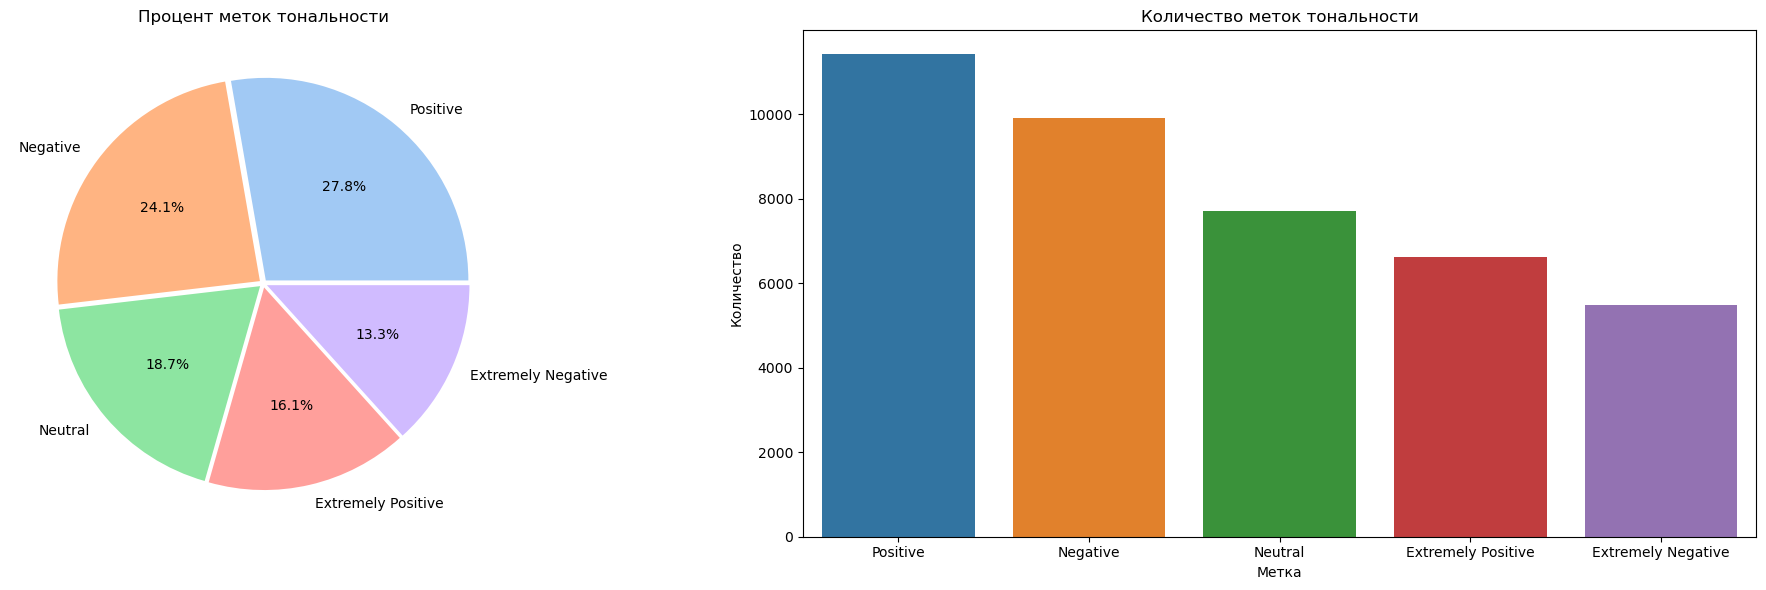

In [155]:
label_count = df["Sentiment"].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
color = sns.color_palette(palette="pastel")
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct="%1.1f%%", colors = color, explode=explode)
axes[0].set_title("Процент меток тональности")

sns.barplot(x=label_count.index, y = label_count.values, ax=axes[1])
axes[1].set_title("Количество меток тональности")
axes[1].set_xlabel("Метка")
axes[1].set_ylabel("Количество")

plt.tight_layout()
plt.show()